# App dataset with decision trees

In [9]:
!pip install --upgrade scikit-learn==0.21.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit-learn-0.21.1.tar.gz (12.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.21.1-cp38-cp38-linux_x86_64.whl size=24208218 sha256=a29f936624794f41ff171cb367379f6a87b5dac37b3e249ba007475471905385
  Stored in directory: /root/.cache/pip/wheels/0b/cc/6d/e6c44dc46d79bf54383585764aa82e818ad337c79719678e17
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-l

In [3]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 19.75 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/machine_learning_1/decision_trees


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
random.seed(0)

In [5]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
app_dataset

,Gender,Age,App
0,Female,15,Snapchat
1,Female,25,SheIn
2,Male,32,Fantasy PL
3,Female,35,SheIn
4,Male,12,Snapchat
5,Male,14,Snapchat


# With age as a categorical feature

In [6]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Snapchat':[1,0,0,0,1,1],
     'App_Fantasy_PL':[0,0,1,0,0,0],
     'App_SheIn':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Snapchat,App_Fantasy_PL,App_SheIn
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [7]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Snapchat','App_Fantasy_PL','App_SheIn']]

In [10]:
from sklearn.tree import DecisionTreeClassifier
## TODO ##
# Train a Decision Tree Classifier and print score
dt =DecisionTreeClassifier()
# Train Decision Tree Classifer
dt.fit(X,y)

#Predict the response for test dataset
y_pred = dt.predict(X)


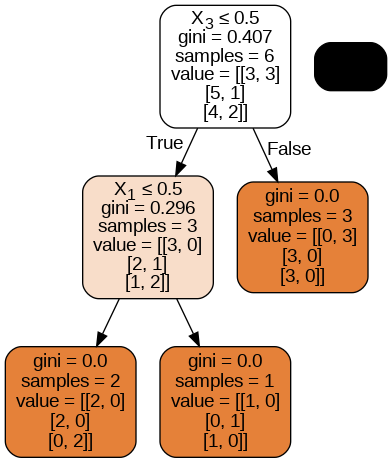

In [11]:
utils.display_tree(dt)

# With age as a numerical feature

In [12]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
print(app_dataset)

   Gender_Female  Gender_Male  Age         App
0              1            0   15    Snapchat
1              1            0   25       SheIn
2              0            1   32  Fantasy PL
3              1            0   35       SheIn
4              0            1   12    Snapchat
5              0            1   14    Snapchat


In [13]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [14]:
labels = app_dataset['App']
print(labels)

0      Snapchat
1         SheIn
2    Fantasy PL
3         SheIn
4      Snapchat
5      Snapchat
Name: App, dtype: object


In [15]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

In [20]:
## TODO ##
# predict
# A girl aged 13
print(app_model.predict(np.array([13,0,1]).reshape(1, -1)))
# A woman aged 28
print(app_model.predict(np.array([28,1,0]).reshape(1, -1)))
# A man aged 34
print(app_model.predict(np.array([34,0,1]).reshape(1, -1)))

['Snapchat']
['SheIn']
['Fantasy PL']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  


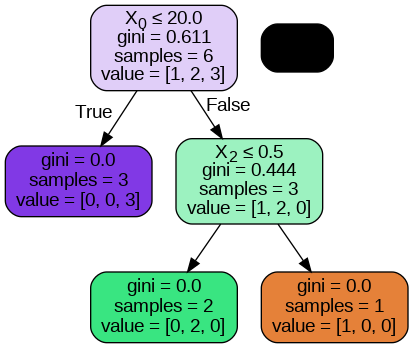

In [21]:
utils.display_tree(app_model)

# Decision trees for regression

In [22]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,6,0,1,0,4,3]

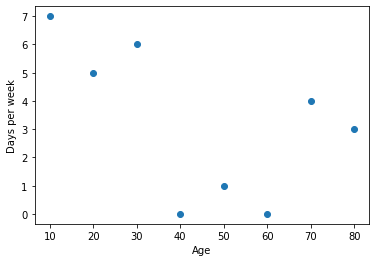

In [23]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [28]:
# use Decision Tree for Regreesion to fit tha data
# use depth = 2
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dt_regressor = DecisionTreeRegressor(max_depth=2) 
  
# fit the regressor with X and Y data
dt_regressor.fit(features, labels)


DecisionTreeRegressor(max_depth=2)

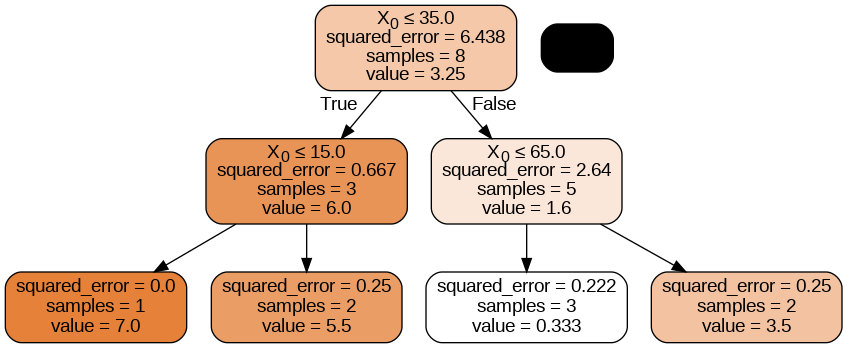

In [29]:
utils.display_tree(dt_regressor)

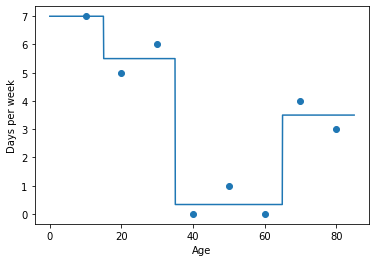

In [30]:
utils.plot_regressor(dt_regressor, features, labels)